<a href="https://colab.research.google.com/github/havvanurrana/neural_networks/blob/main/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
#Girdiler (X) metrekare ve oda sayısı
X =np.array([[50,1],[60,1],[80,2],[100,2],[120,3],[150,3],[200,4]], dtype=float)
#Hedefler evin fiyatı
y =np.array([100,120,160,200,240,300,400], dtype=float)


In [ ]:
#ANN Mimarisi
model = Sequential([
    #Giriş katmanı ve ilk gizli katman
    #2 veri alma 10 nöronlu bir gizli katman
    Dense(units=10, activation='relu', input_shape=[2]),
    Dense(units=5, activation='relu'),
    Dense(units=1)

])
model.compile(optimizer='adam', loss ='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Eğitim başlıyor
Eğitim tamam


<function matplotlib.pyplot.show(close=None, block=None)>

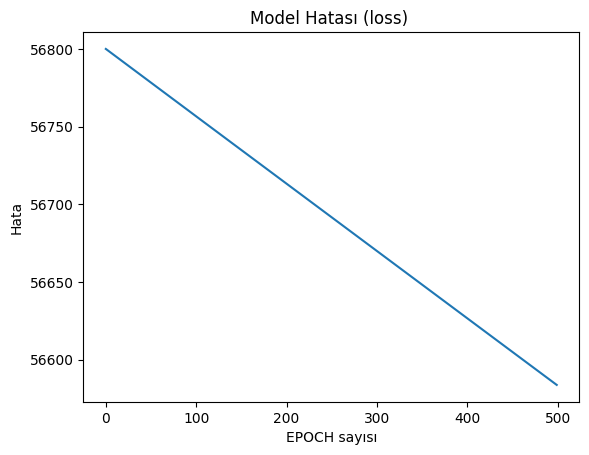

In [ ]:
print("Eğitim başlıyor")
history = model.fit(X,y, epochs=500,verbose =0)
print("Eğitim tamam")

plt.plot(history.history['loss'])
plt.title('Model Hatası (loss) ')
plt.xlabel("EPOCH sayısı")
plt.ylabel('Hata')
plt.show

In [ ]:
test =np.array([[130,3]], dtype=float)
tahmin =model.predict(test)
print(f"tahmin sonucu\n")
print(f"girdi: 130 m^2 ve 3 oda")
print(f"modelin biçtiği fiyat: {tahmin[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
tahmin sonucu

girdi: 130 m^2 ve 3 oda
modelin biçtiği fiyat: 0.50


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


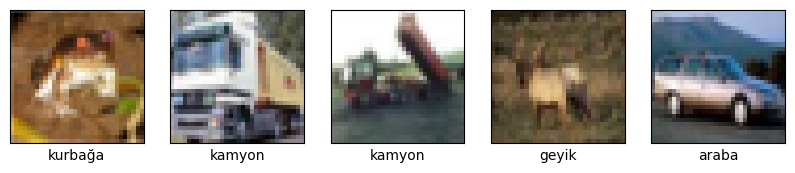

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images/255.0 , test_images/255.0
class_names =['ucak', 'araba', 'kus', 'kedi', 'geyik', 'kopek', 'kurbağa', 'at', 'gemi', 'kamyon']
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
#CNN Mimarisi Tasarımı
import tensorflow as tf
from tensorflow.keras import layers, models

cnn_model = models.Sequential([
    # 1.Evrişim katmanı,(32 farklı filte) resmin kenarlarını algılaması için
    layers.Conv2D(32,(3,3), activation ='relu', input_shape=(32,32,3)),

    #Pooling: resmi küçültür ve en önemli özelliklerini elde tutar.
    layers.MaxPooling2D((2,2)),

    # 2.Evrişim katmanı, daha karmaşık şekiller için
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    # 3. Evrişim katmanı
    layers.Conv2D(64, (3,3), activation = 'relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("cnn eğitimi başlıyor")

cnn eğitimi başlıyor


In [ ]:
history = cnn_model.fit(train_images, train_labels, epochs=10, validation_data =(test_images, test_labels))
print("eğitim bitti")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3434 - loss: 1.7682 - val_accuracy: 0.5174 - val_loss: 1.3697
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5701 - loss: 1.2109 - val_accuracy: 0.6245 - val_loss: 1.0718
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6406 - loss: 1.0250 - val_accuracy: 0.6642 - val_loss: 0.9591
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6807 - loss: 0.9071 - val_accuracy: 0.6813 - val_loss: 0.9202
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7104 - loss: 0.8340 - val_accuracy: 0.6852 - val_loss: 0.9103
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7314 - loss: 0.7707 - val_accuracy: 0.6963 - val_loss: 0.8814
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7525 - loss: 0.7091 - val_accuracy: 0.6989 - val_loss: 0.8955
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7648 - loss: 0.6685 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step
Bu resim %79.71 ihtimalle bir kamyon.


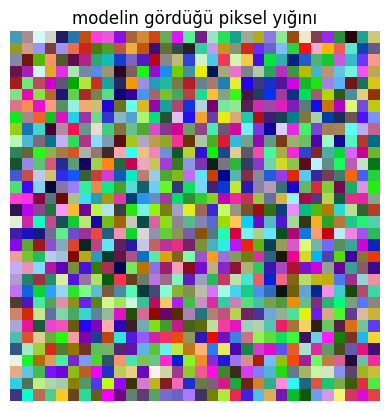

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import  matplotlib.pyplot as plt

sample_image = np.random.rand(32, 32, 3)

# 2. Modeli test etmek için boyutu ayarlıyoruz (1 resim, 32x32, 3 kanal)
img_array = np.expand_dims(sample_image, axis=0)

predictions =cnn_model.predict(img_array)
score =tf.nn.softmax(predictions[0])

class_names = ['ucak', 'araba', 'kus', 'kedi', 'geyik', 'kopek', 'kurbağa', 'at', 'gemi', 'kamyon']
print(f"Bu resim %{100 * np.max(score):.2f} ihtimalle bir {class_names[np.argmax(score)]}.")

plt.imshow(sample_image)
plt.title("modelin gördüğü piksel yığını")
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#ilanlar
ilanlar = [
    "Harika manzaralı satılık lüks villa",
    "Acil satılık ucuz daire",
    "Şehir merkezinde ferah kiralık ev"
]

tokenizer = Tokenizer(num_words =100)
tokenizer.fit_on_texts(ilanlar)
sekanslar = tokenizer.texts_to_sequences(ilanlar)

veri = pad_sequences(sekanslar, padding = 'post')
print("kelimelerin sayı karşılıkları", tokenizer.word_index)

print("cümlelerin sayı dizisi hali" ,veri)

kelimelerin sayı karşılıkları {'satılık': 1, 'harika': 2, 'manzaralı': 3, 'lüks': 4, 'villa': 5, 'acil': 6, 'ucuz': 7, 'daire': 8, 'şehir': 9, 'merkezinde': 10, 'ferah': 11, 'kiralık': 12, 'ev': 13}
cümlelerin sayı dizisi hali [[ 2  3  1  4  5]
 [ 6  1  7  8  0]
 [ 9 10 11 12 13]]


In [ ]:
# İlk RNN yapısı
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,Dense

nlp_model= Sequential([
    Embedding(input_dim =100, output_dim =16),
    LSTM(32),
    Dense(1, activation='sigmoid')

])

nlp_model.compile( optimizer ='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

nlp_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. VERİ HAZIRLAMA
cumleler = [
    "harika lüks villa",
    "muhteşem manzaralı daire",
    "ferah geniş ev",
    "bakımsız eski bina",
    "rutubetli bodrum kat",
    "sorunlu acil satılık"
]
etiketler = np.array([1, 1, 1, 0, 0, 0])

# 2. TOKENIZER (Kelimeleri Sayıya Çevirme)
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(cumleler) # Metinleri öğren
sekanslar = tokenizer.texts_to_sequences(cumleler) # Sayıya çevir
veri_hazir = pad_sequences(sekanslar, padding='post') # Boyutları eşitle

# 3. MODEL MİMARİSİ
nlp_model = Sequential([
    Embedding(input_dim=100, output_dim=16),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

nlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. EĞİTİM
print("Eğitim başlıyor...")
nlp_model.fit(veri_hazir, etiketler, epochs=50, verbose=1)
print("Eğitim tamamlandı!")

Eğitim başlıyor...
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6667 - loss: 0.6919
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8333 - loss: 0.6910
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.6900
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.6890
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.6880
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.6870
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.6859
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.6847
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.6834
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.6821
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.6807
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000

In [ ]:
test_ilani =["bu bina çok eski ve bakımsız görünüyor"]
test_sekans=tokenizer.texts_to_sequences(test_ilani)
test_hazir = pad_sequences(test_sekans, maxlen=veri_hazir.shape[0], padding='post')

sonuc =nlp_model.predict(test_hazir)
if sonuc[0][0] > 0.5:
    print("Yorum: Model bu evi beğendi! 😊")
else:
    print("Yorum: Model bu evde sorunlar görüyor. 😞")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Yorum: Model bu evde sorunlar görüyor. 😞


In [ ]:
test_ilani =["bu bina çok harika , muhteşem  görünüyor"]
test_sekans=tokenizer.texts_to_sequences(test_ilani)
test_hazir = pad_sequences(test_sekans, maxlen=veri_hazir.shape[0], padding='post')

sonuc =nlp_model.predict(test_hazir)
if sonuc[0][0] > 0.5:
    print("Yorum: Model bu evi beğendi! 😊")
else:
    print("Yorum: Model bu evde sorunlar görüyor. 😞")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Yorum: Model bu evi beğendi! 😊


In [ ]:
!pip install transformers
from transformers import pipeline

nlp_dev = pipeline("sentiment-analysis")
test_cumlesi = "bu bina çok harika , muhteşem ama  eski görünüyor"
sonuc_dev = nlp_dev(test_cumlesi)
print(f"\n--- TRANSFORMER (BERT) ANALİZ SONUCU ---")
print(f"Cümle: {test_cumlesi}")
print(f"Sonuç: {sonuc_dev}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0



--- TRANSFORMER (BERT) ANALİZ SONUCU ---
Cümle: bu bina çok harika , muhteşem ama  eski görünüyor
Sonuç: [{'label': 'NEGATIVE', 'score': 0.9767752289772034}]


In [ ]:
from transformers import pipeline

nlp_dev = pipeline("sentiment-analysis")
test_cumlesi = "bu bina çok harika , muhteşem, eski ama  Eskiliği muazzam bir hava katmış"
sonuc_dev = nlp_dev(test_cumlesi)
print(f"\n--- TRANSFORMER (BERT) ANALİZ SONUCU ---")
print(f"Cümle: {test_cumlesi}")
print(f"Sonuç: {sonuc_dev}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0



--- TRANSFORMER (BERT) ANALİZ SONUCU ---
Cümle: bu bina çok harika , muhteşem, eski ama  Eskiliği muazzam bir hava katmış
Sonuç: [{'label': 'NEGATIVE', 'score': 0.9812904000282288}]


In [ ]:
!pip install -q keras-nlp

import keras_nlp
import tensorflow as tf

classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_tiny_en_uncased",
    num_classes=2
)

test_cumlesi = "harika , muhteşem ama eski"
predictions = classifier.predict([test_cumlesi])

print(f"\n--- GOOGLE KERAS-NLP SONUCU ---")
print(f"Cümle: {test_cumlesi}")
print(f"Tahmin (Ham Veri): {predictions}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step

--- GOOGLE KERAS-NLP SONUCU ---
Cümle: harika , muhteşem ama eski
Tahmin (Ham Veri): [[ 0.25390303 -0.05910587]]
